# Plotting Training and testing

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import gym
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import defaultdict
import os, sys
root = os.getcwd()
sys.path.append(root)
sys.path.append('..')

import matplotlib as mpl
mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['font.size'] = 8
# mpl.rcParams['font.family'] = 'serif'
import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)

import utils.plot_utils as pltu
from logger import *
from utils.plot_utils import *
from plot_functions import *
from configs import *
from models.model_lstm import *
import tasks.generative_1d
from tasks.generative_1d import *
from train import *
# from plot_functions import plot_behavior_novel_contexts, plot_histograms_novel_contexts
# from plot_functions import plot_combined_behavior_and_histograms
from plot_functions import *

default_mean1 = 0.3
default_mean2 = 0.7
default_std = 0.3
default_std_novel = 0.2
means = np.array(list(range(-2, 13)))/10
stds = [0.1, 0.2, 0.3, 0.4, 0.5]


# Cortex RNN

Create simple training plot

env_id is larger than thalamus size, setting it to thalamus size-1


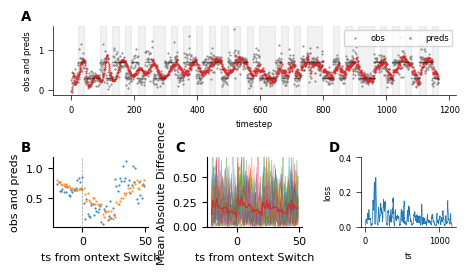

In [6]:
# Train RNN
# config = Config(env_kwargs= { 'gauss1': {'mean': default_mean1, 'std': default_std}, 'gauss2': {'mean': default_mean2, 'std': default_std},})
config = generalization_mean_and_var_Config (env_kwargs= { 'gauss1': {'mean': default_mean1, 'std': 0.1},
                'gauss2': {'mean': default_mean2, 'std': 0.1}, 'gauss3': {'mean': default_mean1, 'std': 0.2},
                 'gauss3': {'mean': default_mean2, 'std': 0.2}}, context_units=2)

scale = 10
training_phase_1_config = {'context_transition_function':'geometric',
        'max_trials_per_block':int(scale*5), 'min_trials_per_block':int(scale*2),
        'context_switch_rate': 1/(scale*(5-3)), 'no_of_blocks':50}
config.training_phases= [{'start_ts': 1, 'config': training_phase_1_config}]
logger = Logger(config)
env = Generative_environment(config)
model = LSTM_model(config,hidden_size=100)
WU_optimizer = optim.Adam(model.parameters(), lr=0.001)
ts_in_training= 0
horizon = 5

_use_oracle = False
memory_buffer, losses = adapt_model_v2(model, env, _use_oracle, config, WU_optimizer, horizon, nn.MSELoss(), ts_in_training, logger)
plot_behavior(memory_buffer, env, losses, config, _use_oracle )

env_id is larger than thalamus size, setting it to thalamus size-1


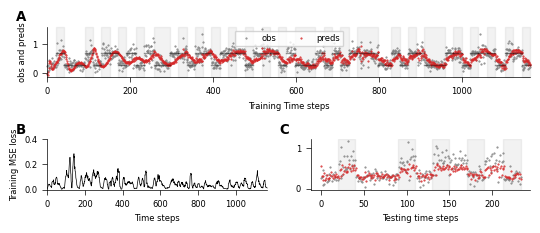

In [7]:
# Testing and plotting
config.training_phases[0]['config']['no_of_blocks'] = 10
testing_env = Generative_environment(config, adapt_env=1)
horizon = 5
optimizer = torch.optim.SGD([model.get_parameter('thalamus')], lr=.30, momentum=0.5)
logger = Logger(config)
criterion = nn.MSELoss(reduction='sum')
_use_oracle = False
_use_optimized_thalamus = True
testing_memory_buffer, testing_losses = adapt_model_v2(model, testing_env, _use_oracle, config, optimizer, horizon, criterion,
                                                ts_in_training, logger, _use_optimized_thalamus=_use_optimized_thalamus)
                                       
plot_behavior_simple(memory_buffer, env, losses, config, _use_oracle, testing_memory_buffer, testing_env)
# plt.savefig(f'./exports/Cortex_only_CL_behavior.pdf')

#### Train RNN Cortex+MD  (THe only difference from the above case is Oracle is True)


env_id is larger than thalamus size, setting it to thalamus size-1


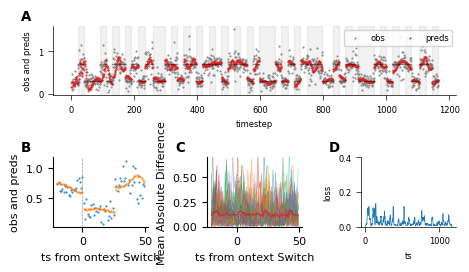

In [8]:
# config = Config(env_kwargs= { 'gauss1': {'mean': default_mean1, 'std': default_std}, 'gauss2': {'mean': default_mean2, 'std': default_std},})
config = generalization_mean_and_var_Config (env_kwargs= { 'gauss1': {'mean': default_mean1, 'std': 0.1},
                'gauss2': {'mean': default_mean2, 'std': 0.1}, 'gauss3': {'mean': default_mean1, 'std': 0.2},
                 'gauss3': {'mean': default_mean2, 'std': 0.2}}, context_units=2)

scale = 10
training_phase_1_config = {'context_transition_function':'geometric',
        'max_trials_per_block':int(scale*5), 'min_trials_per_block':int(scale*2),
        'context_switch_rate': 1/(scale*(5-3)), 'no_of_blocks':50}
config.training_phases= [{'start_ts': 1, 'config': training_phase_1_config}]
logger = Logger(config)
env = Generative_environment(config)
model = LSTM_model(config,hidden_size=100)
WU_optimizer = optim.Adam(model.parameters(), lr=0.001)
ts_in_training= 0
horizon = 5

_use_oracle = True
memory_buffer, losses = adapt_model_v2(model, env, _use_oracle, config, WU_optimizer, horizon, nn.MSELoss(), ts_in_training, logger)
plot_behavior(memory_buffer, env, losses, config, _use_oracle )

env_id is larger than thalamus size, setting it to thalamus size-1


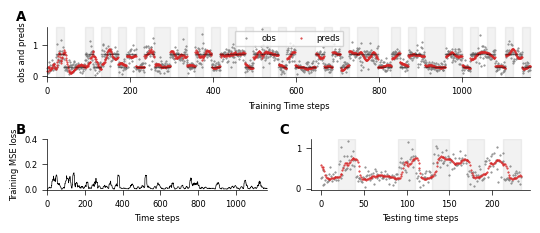

In [9]:
# Testing and plotting
config.training_phases[0]['config']['no_of_blocks'] = 10
testing_env = Generative_environment(config, adapt_env=1)
horizon = 5
optimizer = torch.optim.SGD([model.get_parameter('thalamus')], lr=.30, momentum=0.5)
logger = Logger(config)
criterion = nn.MSELoss(reduction='sum')
_use_oracle = False
_use_optimized_thalamus = True
testing_memory_buffer, testing_losses = adapt_model_v2(model, testing_env, _use_oracle, config, optimizer, horizon, criterion,
                                                ts_in_training, logger, _use_optimized_thalamus=_use_optimized_thalamus)
                                       
plot_behavior_simple(memory_buffer, env, losses, config, _use_oracle, testing_memory_buffer, testing_env)
# plt.savefig(f'./exports/Cortex_MD_CXT_CL_behavior.pdf')
